# Nyquist

In [3]:
import numpy as np
import sympy as sy
import itertools
import matplotlib.pyplot as plt
import control.matlab as cm
init_printing()
%matplotlib inline

## Proportional control of the normalized DC-motor
Zero-order hold sampling of the DC motor with transfer function $G(s)=\frac{1}{s(s+1)}$ gives the discrete time system
\begin{equation} H(z) = \frac{\big(h-1+e^{-h}\big)z + \big(1-e^{-h}-he^{-h}\big)}{z^2 -\big(1+e^{-h}\big)z + e^{-h}} \end{equation}

Let $h=\ln 2 \approx 0.693$. This gives the pulse-transfer function
\begin{equation} H(z) = \frac{B(z)}{A(z)} = \frac{0.19z + 0.15}{z^2 - 1.5z + 0.5} \end{equation}

Proportional control gives the closed loop system 
\begin{equation} 
H_c(z) = \frac{K H(z)}{KH(z) + 1} = \frac{K B(z)}{A(z) + KB(z)}.
\end{equation}
The characteristic equation of the closed loop system is
\begin{equation}
z^2 + (-1.5+0.19K)z + 0.5+0.15K 
\end{equation}

In [4]:
z,h = sy.symbols('z,h')
eh = sy.exp(-h)
H = ( (h-1+eh)*z + (1-eh-h*eh) )/( z*z - (1+eh)*z + 0.5)

B,A = sy.fraction(H)
print A

z**2 - z*(1 + exp(-h)) + 0.5


In [28]:
Hs = {}
Hs2 = {}
H0 = cm.tf([1.0], [1, 1, 0])
Hs[0] = (H0,[1.0],[1.0, 1.0, 0])
Hs2[0] = (H0,[1.0],[1.0, 1.0, 0])
for hh in [0.01, 0.1, 0.2, 0.4, 0.8, 1]:
    Bp = sy.Poly(B.subs(h,hh))
    Ap = sy.Poly(A.subs(h,hh))
    a = []
    for el in Ap.coeffs():
        a.append(float(sy.N(el)))
    b = []
    for el in Bp.coeffs():
        b.append(float(sy.N(el)))
    Hs[hh] = (cm.tf(b,a,hh), b,a)
    Hs2[hh] = (cm.c2d(H0, hh), b,a)


(-2, 1)

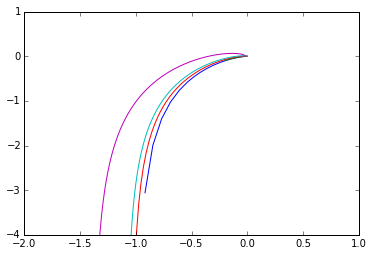

In [33]:
z = np.exp(1j*np.linspace(0.02,np.pi, 800))
s = 1j*np.linspace(0.3,100,800)

zz = Hs[0][0](s);


xy = np.column_stack((np.real(zz),np.imag(zz)))
np.savetxt('nyquistH0150908.out', xy, fmt='%10.5f')

for (hh,HH) in Hs2.iteritems():
    if hh > 0:
        zz = HH[0](z);
        xy = np.column_stack((np.real(zz),np.imag(zz)))
        np.savetxt('nyquistHzz%d150908.out' % (100*hh), xy, fmt='%10.5f')


zz = Hs2[0][0](s);
zz2 = Hs2[0.01][0](z);
zz3 = Hs2[0.1][0](z);
zz4 = Hs2[0.2][0](z);
zz5 = Hs2[0.8][0](z);

plt.figure()
plt.plot(np.real(zz), np.imag(zz))
plt.plot(np.real(zz2), np.imag(zz2))
plt.plot(np.real(zz3), np.imag(zz3))
plt.plot(np.real(zz4), np.imag(zz4))
plt.plot(np.real(zz5), np.imag(zz5))
plt.ylim(-4,1)
plt.xlim(-2,1)
    


In [38]:
Hln2 = H.subs(h, np.log(2))
Hln2 = cm.tf([0.19, 0.15], [1, -1.5, 0.5], np.log(2))
Hln2


  0.19 z + 0.15
-----------------
z^2 - 1.5 z + 0.5

dt = 0.69314718056

(-3, 3)

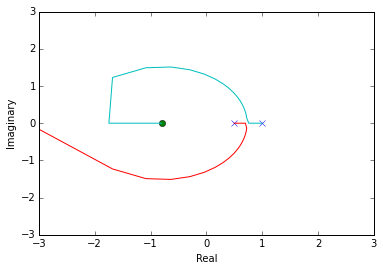

In [41]:
cm.rlocus(Hln2)
plt.ylim(-3,3)
plt.xlim(-3,3)

### Apply Jury's criterion